## Task 1: Exploratory Data Analytics
### Data Collection

In [165]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt    #For plotting.


train_df = pd.read_csv("train.csv")

def extract_features(fitting_var):
    cv_all_articles = CountVectorizer()
    cv_all_articles.fit(fitting_var)
    vec = cv_all_articles.transform(fitting_var)
    matrix = vec.toarray()              #Each row an article, each column a word.
    word_bank = cv_all_articles.get_feature_names_out()
    frequencies = matrix.sum(axis=0)    #Each column represents the frequency of a word in our articles
    return matrix, word_bank, frequencies, cv_all_articles


y = train_df["Category"].to_numpy()
unique_classes = np.unique(y)
print("Unique classes:", unique_classes)

Unique classes: ['entertainment' 'tech']


### Task 1 A
#### Report number of articles, number of extracted features and 5 example articles

In [166]:
# Now get five example articles (Q1 a))

X, whole_word_bank, whole_frequencies, cv = extract_features(train_df['Text'])
print("Number of articles: ", X.shape[0])
print("Number of features: ", X.shape[1])

for i in range(5):
    matrix, word_bank, frequencies, vectoriser = extract_features([train_df['Text'][i]])
    print(f"Article: {i+1} has features \n{word_bank}\n\n")
    print(word_bank.size)


Number of articles:  428
Number of features:  13518
Article: 1 has features 
['000' '14' '2003' '25' '29' '45' 'able' 'across' 'activity' 'advisor'
 'ageing' 'ago' 'almost' 'alone' 'also' 'although' 'always' 'among'
 'analogue' 'another' 'bbc' 'behind' 'better' 'birthdays' 'bjorn' 'bought'
 'camera' 'cameras' 'capture' 'change' 'changed' 'chat' 'children' 'chip'
 'choice' 'consumer' 'consumers' 'contact' 'contrast' 'convenient' 'could'
 'customers' 'depth' 'desire' 'devices' 'diaries' 'diary' 'different'
 'digital' 'divide' 'dr' 'drive' 'dubbed' 'early' 'encouraged' 'end'
 'enterprise' 'equipped' 'ericsson' 'especially' 'europe' 'european'
 'even' 'events' 'everyday' 'exactly' 'example' 'factor' 'far' 'faster'
 'figure' 'film' 'firms' 'fit' 'fits' 'five' 'flop' 'focus' 'form'
 'friends' 'funkier' 'get' 'going' 'good' 'governing' 'governs'
 'gradually' 'groups' 'habits' 'handset' 'handsets' 'hardware' 'help'
 'helps' 'historically' 'holidays' 'however' 'imply' 'industry'
 'innovation' '

Printed above are the unique words in each article. Each article will have 13518 features, 1 for each unique word across the whole dataset, for the words in each article's list the value for that word feature is 1 while all the other words not in the list will have 0.

### Task 1 B
#### i) Top 50 Frequency plot

[10567  8917  8257  8516   859  4899 13459  8108 12829  8069 13402  1610
  3158  4962 12634  7939 12285 11013  7552  8399  7494 12090 12603 12835
  7236  7856 13386  3748  7060 12616  5317  8234 12841 11254 13463  9010
  5432 12352  1496 12836 10876  2879     1 13153 12238 13211  7459  8523
   193  5309]
Rank. word: frequency
1. said: 1357
2. people: 612
3. new: 500
4. one: 479
5. also: 479
6. film: 462
7. year: 442
8. music: 413
9. us: 411
10. mr: 408
11. would: 374
12. best: 361
13. could: 322
14. first: 306
15. uk: 297
16. mobile: 291
17. time: 271
18. show: 271
19. many: 259
20. number: 257
21. make: 253
22. technology: 250
23. tv: 246
24. use: 241
25. like: 239
26. million: 229
27. world: 222
28. digital: 221
29. last: 220
30. two: 217
31. games: 216
32. net: 216
33. users: 214
34. software: 213
35. years: 212
36. phone: 200
37. get: 198
38. top: 195
39. bbc: 189
40. used: 183
41. service: 180
42. computer: 180
43. 000: 179
44. way: 178
45. three: 173
46. well: 172
47. made: 169
4

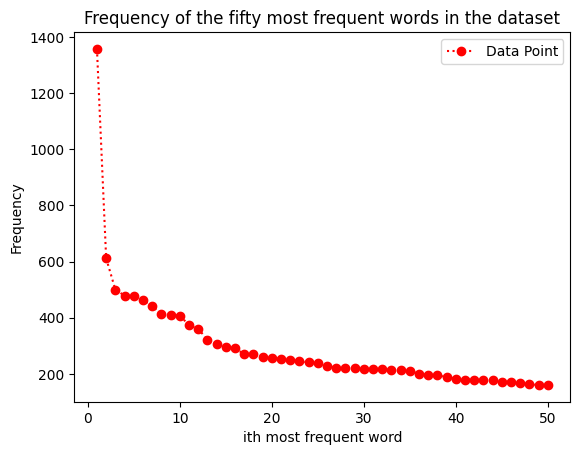

In [167]:
#Get the top 50 terms in the entire dataset
indices_50 = whole_frequencies.argsort()[-50:][::-1] #Get the indices of the top 50 terms
print(indices_50)

top_50_features = whole_word_bank[indices_50] #Get the top 50 features
top_50_feature_frequencies = whole_frequencies[indices_50] #Get the frequencies of the top 50 features

print("Rank. word: frequency")
for i in range(top_50_features.size):
    print(f"{i+1}. {top_50_features[i]}: {top_50_feature_frequencies[i]}") #Print the top 50 features and their frequencies

#Now we can plot the top 50 features with their frequencies
plt.plot()

plt.plot([i+1 for i in range(50)], top_50_feature_frequencies, linestyle = ':', marker='o', color="r", label="Data Point")
plt.xlabel('ith most frequent word')
plt.ylabel("Frequency")
plt.legend()
plt.title("Frequency of the fifty most frequent words in the dataset")
plt.show()

#### ii) Frequency distribution for features for each class

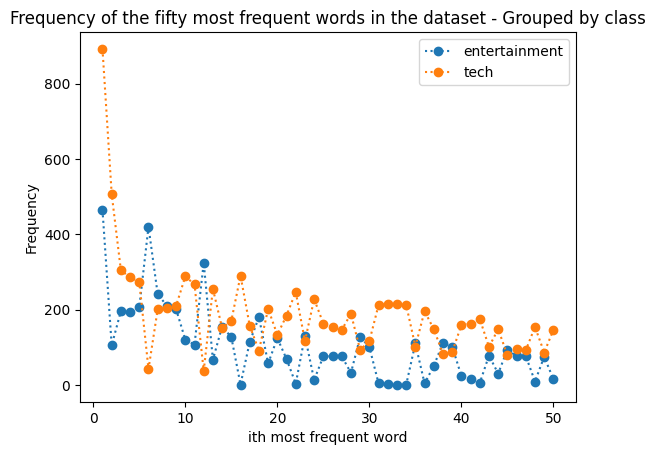

In [168]:
# code for task 1 b/ii
# Assuming this is using the above words, and getting their frequencies for each class



# Get the frequencies of the top 50 features for each class

plt.plot()

for class_name in unique_classes:
    #Get indices (Rows) of the matrix which corresonds to current class
    class_indices = np.where(y == class_name)[0]
    #Now get the frequencies of the top 50 features for this class
    class_frequencies_ii = X[class_indices][:, indices_50].sum(axis=0) # Sum the frequencies of the correct rows and columns
    plt.plot([i+1 for i in range(50)], class_frequencies_ii, linestyle=':', marker='o', label=class_name)

plt.xlabel('ith most frequent word')
plt.ylabel("Frequency")
# plt.plot([i+1 for i in range(50)], top_50_feature_frequencies, linestyle = ':', marker='o', color="r", alpha=0.4, label="Data Point") Overlay plot i)
plt.legend()
plt.title("Frequency of the fifty most frequent words in the dataset - Grouped by class")
plt.show()
        


#### iii) Class distribution - plot frequency of classes.

216 212


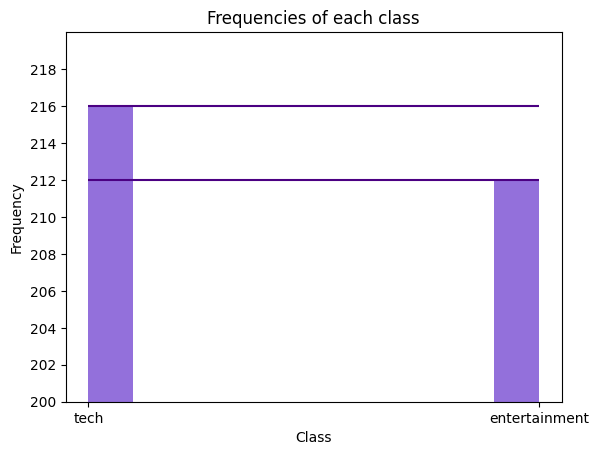

In [169]:
# code for task 1 b/iii
plt.hist(y, color="mediumpurple")
print(np.count_nonzero(y[y == "tech"]), np.count_nonzero(y[y == "entertainment"]))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Frequencies of each class")
plt.yticks(np.arange(0,220, step=2))
plt.ylim(200, 220)
plt.hlines(216, xmin=0, xmax=1, colors="indigo")
plt.hlines(212, xmin=0, xmax=1, colors="indigo")
plt.show()


In [170]:
# get test data
test_df = pd.read_csv('test.csv')
test_y = test_df["Category"].to_numpy()
test_X = cv.transform(test_df['Text']).toarray()

#print(f"{test_df} \n {test_y} \n {test_X}") # Debug

## Task 2: Classification Models Learning
### Task 2 A
#### Naive Bayes Classifier
#### i) Report top 20 most identifiable words that are most likely to occur in the articles over two classes

In [171]:
#Code for 2A Naieve Bayes


from sklearn.naive_bayes import MultinomialNB


#X = whole_matrix
y = train_df['Category'] 
nb_classifier = MultinomialNB()
nb_classifier.fit(X, y)
#Extracting the log probabilities and convert them to regular probabilities
log_probs = nb_classifier.feature_log_prob_
probs = np.exp(log_probs)
words_entertainment = np.argsort(probs[0])[::-1][:20]
words_tech = np.argsort(probs[1])[::-1][:20]

print("Top 20 words for entertaiment:")
print(whole_word_bank[words_entertainment])

print("\nTop 20 words for tech:")
print(whole_word_bank[words_tech])


Top 20 words for entertaiment:
['said' 'film' 'best' 'year' 'music' 'also' 'us' 'new' 'one' 'show'
 'first' 'awards' 'tv' 'last' 'uk' 'actor' 'number' 'band' 'mr' 'star']

Top 20 words for tech:
['said' 'people' 'new' 'mobile' 'mr' 'one' 'also' 'would' 'could'
 'technology' 'use' 'net' 'users' 'software' 'games' 'us' 'music' 'many'
 'year' 'phone']


#### ii) Report the top 20 words that maximise the the probability quantity P(Xw = 1|Y = y)/P(Xw = 1| Y != y). Which list of words describe the 2 classes better?

In [172]:
#Creating the ratio
ratio_entertainment = probs[0] / (probs[1])
top_20_ratio_idx_0 = np.argsort(ratio_entertainment)[::-1][:20]

print("Top 20 discriminative words for entertainment:")
print(whole_word_bank[top_20_ratio_idx_0])
ratio_tech = probs[1] / (probs[0])
top_20_ratio_idx_1 = np.argsort(ratio_tech)[::-1][:20]

print("Top 20 discriminative words for tech:")
print(whole_word_bank[top_20_ratio_idx_1])

#The second list of words describes the two classes better in my opinion, as they are not just common words, but are list of words that are words disproportionately associated with one class versus the other.


Top 20 discriminative words for entertainment:
['actress' 'singer' 'oscar' 'stars' 'aviator' 'band' 'nominated' 'rock'
 'festival' 'album' 'nominations' 'charles' 'chart' 'foxx' 'oscars'
 'starring' 'singles' 'jamie' 'swank' 'comedy']
Top 20 discriminative words for tech:
['users' 'software' 'microsoft' 'mobile' 'broadband' 'virus' 'firms' 'pc'
 'spam' 'phones' 'gadget' 'net' 'consumer' 'mobiles' 'machines' 'gadgets'
 'windows' 'technologies' 'systems' 'device']


# Task 2 B
K-Nearest Neighbours Classifier
Report surface plot of the kNN with your choice of hyperparameters k and distance metric. Explain the impact of k and the distance metric on the decision boundary.

Confusion Matrix:
[[ 0  0  1]
 [ 0 60  1]
 [ 0  1 44]]

Classification Report:
               precision    recall  f1-score   support

     Category       0.00      0.00      0.00         1
entertainment       0.98      0.98      0.98        61
         tech       0.96      0.98      0.97        45

     accuracy                           0.97       107
    macro avg       0.65      0.65      0.65       107
 weighted avg       0.96      0.97      0.97       107



c:\Users\suhai\Documents\University 3\COMPSCI 361\group assignment\COMPSCI361-Assignment3\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\suhai\Documents\University 3\COMPSCI 361\group assignment\COMPSCI361-Assignment3\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\suhai\Documents\University 3\COMPSCI 361\group assignment\COMPSCI361-Assignment3\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 

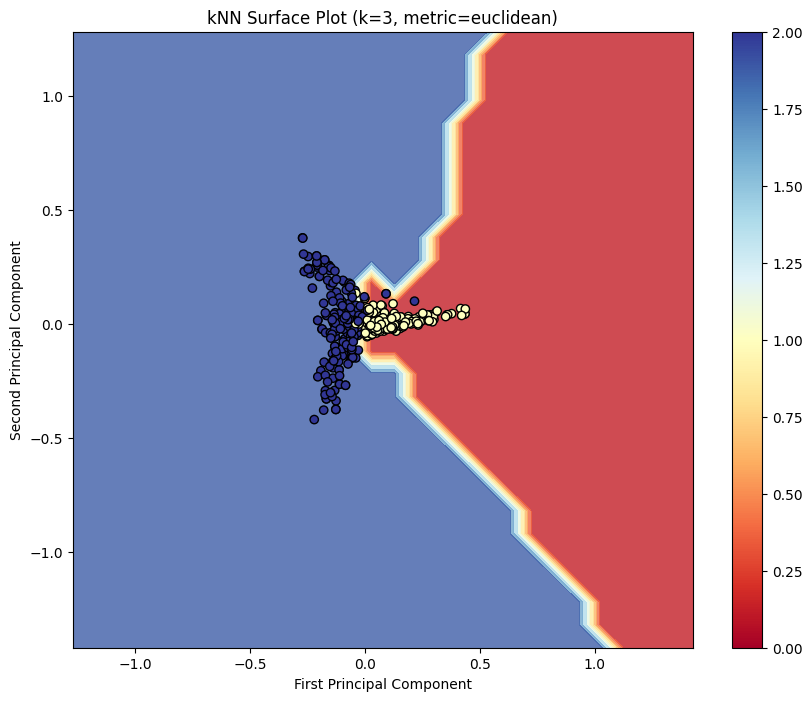

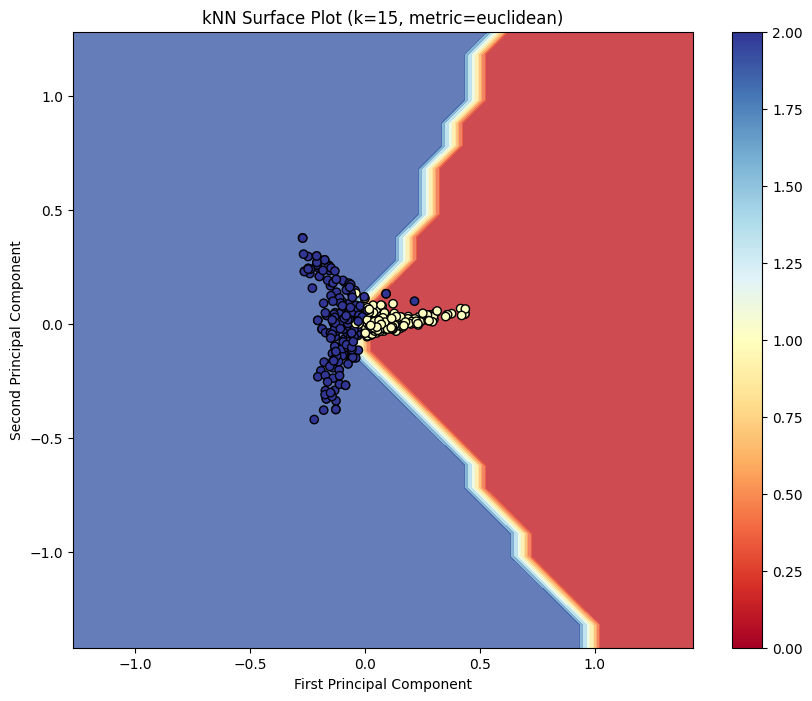

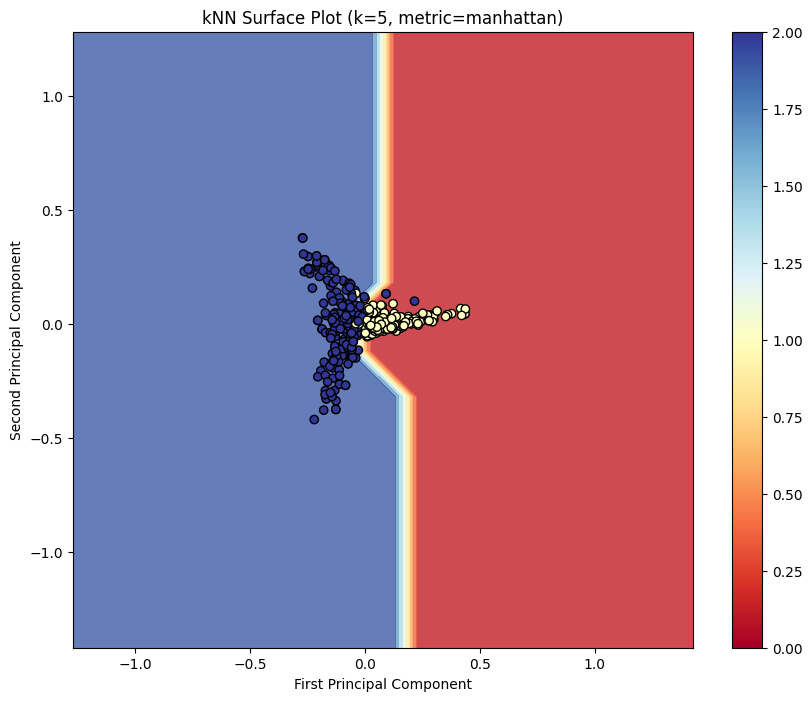

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# load data
train_df = pd.read_csv('train.csv', header=None, names=['id', 'text', 'label'])
test_df = pd.read_csv('test.csv', header=None, names=['id', 'text', 'label'])

# vectorize text using TF-IDF 
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

y_train = train_df['label']
y_test = test_df['label']

# train kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predict and evaluate 
y_pred = knn.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Convert to dense and apply PCA for 2D visualization
X_train_dense = X_train.toarray()
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_dense)

# Convert string labels to numeric for plotting
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)

# Function to create surface plot
def create_surface_plot(X_2d, y_numeric, k_val, distance_metric):
    knn_2d = KNeighborsClassifier(n_neighbors=k_val, metric=distance_metric)
    knn_2d.fit(X_2d, y_numeric)
    
    # Create mesh for decision boundary
    h = 0.1
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdYlBu')
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_numeric, cmap='RdYlBu', edgecolors='black')
    plt.colorbar()
    plt.title(f'kNN Surface Plot (k={k_val}, metric={distance_metric})')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

# Create surface plots with different hyperparameters
create_surface_plot(X_train_2d, y_train_numeric, 3, 'euclidean')  # Small k
create_surface_plot(X_train_2d, y_train_numeric, 15, 'euclidean') # Large k
create_surface_plot(X_train_2d, y_train_numeric, 5, 'manhattan')  # Different metric

### Task 2 C
#### Support Vector Machines
#### i) Soft margin linear kernel SVM
#### Report surface plot and explain the impact of the penalty C hyperparameter

## Soft-margin SVM Model

In [174]:
# code for task 2 C soft margin linear kernel svm
# for surface plots check note on assignment pdf at bottom of task 2
from sklearn import svm
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Use SKLearn to fit our data into a linear SVM model
cValue = 2.45
soft_linear = svm.SVC(kernel="linear", C=cValue)
soft_linear.fit(X, y)

## Test Accuracy with test.csv:
# Using the test data we have (test_df) to see how the model predicts based on C value.
test_pred = soft_linear.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_pred, normalize=True)
print(f"Accuracy for soft margin SVM at C-Penalty={cValue}: {accuracy*100:.2f}%\n")



Accuracy for soft margin SVM at C-Penalty=2.45: 100.00%



## PCA-Reduced Soft-margin SVM Model

Accuracy for PCA-reduced SVM at C-Penalty=2.45: 92.45%



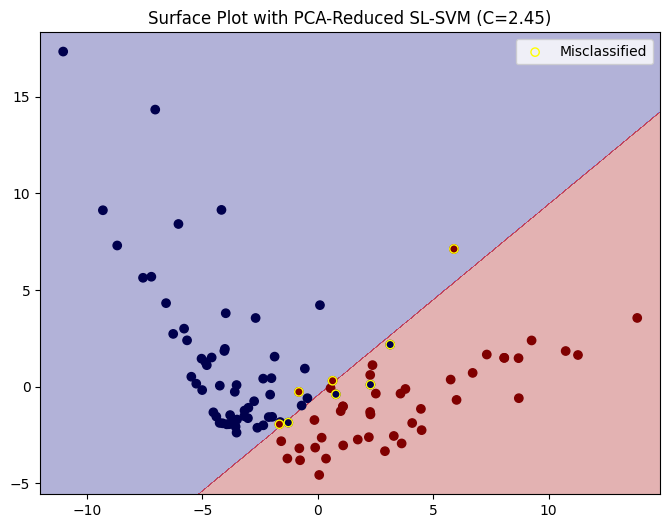

In [175]:
## Create a surface plot for our SVM using Principal Component Analysis :
# Use PCA to reduce the dimensionality of our test,training-data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
test_X_pca = pca.transform(test_X)

# encode the pred and test labels for plotting
le = LabelEncoder()
y_encoded = le.fit_transform(y)
test_y_encoded = le.transform(test_y)

# Retrain our SVM on PCA-reduced data
sl_pca = svm.SVC(kernel="linear", C=cValue)
sl_pca.fit(X_pca, y_encoded)
# Prediction + Accuracy to show that PCA reduces SVM accuracy
pred = sl_pca.predict(test_X_pca)
acc = metrics.accuracy_score(test_y_encoded, pred, normalize=True)
print(f"Accuracy for PCA-reduced SVM at C-Penalty={cValue}: {acc*100:.2f}%\n")
color_assignment = test_y_encoded  # 'entertainment' → 0, 'tech' → 1

# mesh grid to plot decision regions/boundary
x = test_X_pca[:, 0]
y = test_X_pca[:, 1]

x_min, x_max = x.min() -  1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# predict on the mesh grid to get decision regions
Z = sl_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions and data points
misclassified = (pred != test_y_encoded) # identify misclassified points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='seismic')  # Decision boundary/region
plt.scatter(test_X_pca[:, 0], test_X_pca[:, 1], c=color_assignment, cmap='seismic')
plt.scatter(test_X_pca[misclassified, 0], test_X_pca[misclassified, 1], edgecolors='yellow', facecolors='none', label='Misclassified')
plt.legend()
plt.title(f'Surface Plot with PCA-Reduced SL-SVM (C={cValue})')
plt.show()

### PCA Dimensionality Reduction
We are using PCA from `scikitlearn.decomposition` to reduce the dimensionality of our data. After reducing the dimensionality of the dataset - we are retraining an SVM based on that as a PCA-reduced model and plotting the results on a surface plot. 
This is done to ensure we have an accurate representation of the soft margin decision boundary (*the only downside would be the reduced accuracy on a PCA-reduced dataset*).

## Impact of $C$ on Soft-margin Linear SVM
The use of hyperparameter $C$ on SVM is to control the hyperplane decision boundary of our model.
The soft-margin linear SVM is essentialy the same as the hard-margin SVM but with a lower penalty value $C$ that allows for some misclassification (hence, soft margin).

The difference with having **lower $C$ values** is it creates larger margins on our decision boundary - having the potential to increase our overall accuracy% for the model on noisy, overlapping, and messy data. This is good for large datasets with more generalised information i.e. similar features to each label class.
However assigning a **value $C$ that is too low** runs the risk of **underfitting**, (our *margin gets too larger*, the model is more lenient on errors).

With **higher $C$-penalty** the margin for misclassification gets narrower. We can observe this in our model getting a "lower" accuracy for our test articles due to high penalisation. This leads to worse accuracy performance on unseen test data, since our model is trying too hard to strictly classify datapoints, including noise.
We have to consider whether $C$ is **too high**: we have the risk of **overfitting** (*margin is narrower*, more strict on noisy data and errors).

#### ii) Hard margin RBF kernel SVM
#### Report surface plot and explain the impact of the kernel width hyperparameter

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Do PCA so we only have two dimensions
#print("Making pca") # Debug
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
test_x_pca = pca.transform(test_X)

# Convert our y vector to binary (tech, entertainment) --> (1,0)
#print("Label encoder") # Debug
#le = LabelEncoder()
#y_encoded = le.fit_transform(y)
#test_y_encoded = le.transform(test_y)               #entertainment 0, tech 1

# Now we fit our pca points to an rbf kernel model
print("Fitting train") # Debug
rbf_pca = SVC(kernel='rbf', C=1e10, gamma='auto')
rbf_pca.fit(X_pca, y_encoded)

# Now predict our values
print("Predicting") # Debug
pred = rbf_pca.predict(test_x_pca)
color_assignment = test_y_encoded


# Split x and y values to plot our data points
print("Splitting into x, y")
x = test_x_pca[:, 0]
y = test_x_pca[:, 1]
x = X_pca[:, 0]
y = X_pca[:, 1]

# Create the mesh, this allows for our contour to show the regions/boundaries for tech and entertainment.
print("Determining grid") # Debug
x_min, x_max = x.min() -  1, x.max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict to determine the regions and boundaries.
print("Predicting grid") # Debug
Z = rbf_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Allows for highlighting of misclassified points.
print("Getting misclassified") # Debug
misclassified = (pred != test_y_encoded)

# Plot the hard margin RBF kernel
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='seismic')  # Decision boundary/region
#print(test_x_pca[0,0], test_x_pca[0, 1], color_assignment[0]) # Debug
plt.scatter(test_x_pca[:, 0], test_x_pca[:, 1], c=color_assignment, cmap='seismic', label="Testing Data")     #Blue is Entertainment, Tech is 1
plt.scatter(test_x_pca[misclassified, 0], test_x_pca[misclassified, 1], edgecolors='yellow', facecolors='none', label='Misclassified')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='seismic', alpha=0.2, label="Training Data")
plt.legend()
plt.title("Hard margin RBF Kernel, where Red is Tech articles.")
plt.xlim(x_min, 11)
plt.ylim(y_min, 17)
plt.show()

## Dimensionality Reduction
For dimensionality reduction for the hard margin svm we used the same PCA class from scikitlearn.decomposition that was used for the soft margin linear svm. We used the same method of retraining an SVM based on this class as a PCA reduced model and then used this for the surface plot above. This way we can try to demonstrate the decision boundaries.

## C value
Our chosen C value is 10 Billion. We chose this as having such a extremely high misclassification penalty makes the SVM a hard margin by weighting the classification error significantly more in our lagrange optimiser for the SVM. This means the svm will not accept misclassifications in the training data. 

## Gamma and kernel width
We use the gamma parameter of the sklearn SVC class to control the kernel width of our model. Gamme is inversely proportional to kernel width meaning a large gamme value corresponds to a small kernel width and a small gamma value corresponds to a large kernel width. Specifically gamma = 1 / (2 x kernel width^2).
Kernel width is an important hyperparameter to consider for our SVM as it defines the 'radius' of a single training data. If we have a high kernel width each data point influences a larger region and we will get smoother decision boundaries. If we have a small kernel width our decision boundaries are more like the k nearest neighbours classifier, the model is much more sensntive to individual data points.
Our gamma hyperparameter is set to auto, which is 1 / number of features, so for our dataset since we have a feature for each unique word encountered, the number of features is quite large and this our gamme value is quite small. Since our gamma value is small we get a high kernel width. High kernel width means a wider kernel, which results in smoother decision boundaries. Having a higher kernel width and a wider kernel is ideal for our case as our input data is high dimensional. With a smaller kernel width the model is more sensitive to individual data points, this can be a problem for our context as we will have many features for words that may not be relevant in our classification. A larger kernel width allows our svm to generalise better as each data point influences larger regions, which is ideal as we do not want to be too sensitive to some irrelevant features.

### Task 2 D
#### Neural Network
#### add more details later

In [177]:
# code for task 2 D neural network

## Task 3: Classification Quality Evaluation
### Hard margin RBF kernel SVM
#### Task 3 A
#### i) Plot for training accuracy as F1 measure (y axis) for each m value (x axis)
#### ii) Plot for testing accuracy as F1 measure (y axis) for each m value (x axis)

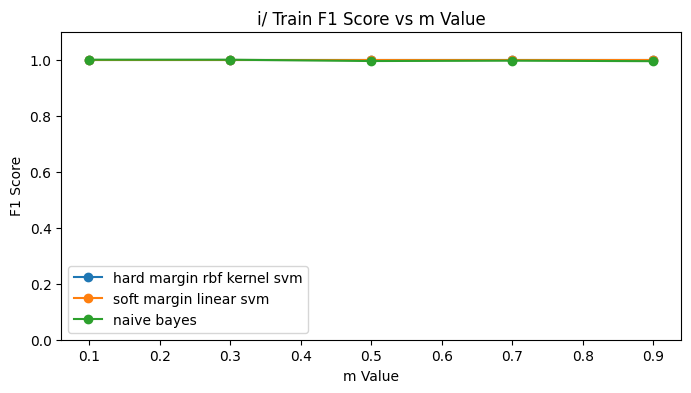

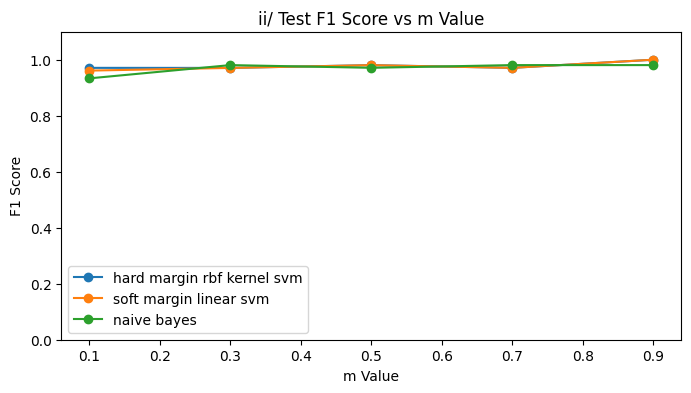

In [178]:
from sklearn.metrics import f1_score

y = train_df["Category"].to_numpy()
m_values = [0.1, 0.3, 0.5, 0.7, 0.9]
train_f1_scores = {"hard margin rbf kernel svm": [], "soft margin linear svm": [],
                   "naive bayes": []}
test_f1_scores = {"hard margin rbf kernel svm": [], "soft margin linear svm": [],
                  "naive bayes": []}
for m in m_values:
    # get training data sub set
    rows = int(m * y.size)
    y_subset = y[0: rows]
    X_subset, whole_word_bank, whole_frequencies, cv_subset = extract_features(train_df['Text'][0:rows])

    # train each model
    # hard margin rbf svm
    rbf = SVC(kernel='rbf', C=1e10, gamma='auto')
    rbf.fit(X_subset, y_subset)

    # soft margin linear svm
    soft_linear = SVC(kernel="linear", C=cValue)
    soft_linear.fit(X_subset, y_subset)

    # naive bayes
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_subset, y_subset)

    # get training accuracy as f1-measure
    # hard margin rbf svm
    y_pred = rbf.predict(X_subset)
    train_f1 = f1_score(y_subset, y_pred, average='macro')
    train_f1_scores["hard margin rbf kernel svm"].append(train_f1)

    # soft margin linear svm
    y_pred = soft_linear.predict(X_subset)
    train_f1 = f1_score(y_subset, y_pred, average='macro')
    train_f1_scores["soft margin linear svm"].append(train_f1)

    # naive bayes
    y_pred = nb_classifier.predict(X_subset)
    train_f1 = f1_score(y_subset, y_pred, average='macro')
    train_f1_scores["naive bayes"].append(train_f1)


    # get testing accuracy as f1-measure
    test_X = cv_subset.transform(test_df['Text']).toarray() # use vectoriser from training to transform test data
    # hard margin rbf svm
    y_pred = rbf.predict(test_X)
    test_f1 = f1_score(test_y, y_pred, average='macro')
    test_f1_scores["hard margin rbf kernel svm"].append(test_f1)

    # soft margin linear svm
    y_pred = soft_linear.predict(test_X)
    test_f1 = f1_score(test_y, y_pred, average='macro')
    test_f1_scores["soft margin linear svm"].append(test_f1)

    # naive bayes
    y_pred = nb_classifier.predict(test_X)
    test_f1 = f1_score(test_y, y_pred, average='macro')
    test_f1_scores["naive bayes"].append(test_f1)


# plot for 3ai: training accuracy f1 score vs m values
plt.figure(figsize=(8, 4))
for model_name, scores in train_f1_scores.items():
    plt.plot(m_values, scores, marker='o', label=model_name)
plt.ylim(0, 1.1)
plt.xlabel('m Value')
plt.ylabel('F1 Score')
plt.title('i/ Train F1 Score vs m Value')
plt.legend()
plt.show()

# plot for 3aii: test accuracy f1 score vs m values
plt.figure(figsize=(8, 4))
for model_name, scores in test_f1_scores.items():
    plt.plot(m_values, scores, marker='o', label=model_name)
plt.ylim(0, 1.1)
plt.xlabel('m Value')
plt.ylabel('F1 Score')
plt.title('ii/ Test F1 Score vs m Value')
plt.legend()
plt.show()


